In [1]:
# This notebook is relevant to Figure 6 in the manuscript.

import pandas as pd
import matplotlib.pyplot as plt


In [48]:
Features = pd.read_csv('IMP_Feature_matrix_acc_gt0.7_IMP_gt0.005_Jun20.csv') # supplentary table 4

In [25]:
Features.shape

(4496, 4)

In [49]:
Features.loc[Features['features'] == 'SPP1-RPS10'].sort_values(by=['IMP'], ascending=False)

,Unnamed: 0,features,IMP,Drug
3431,6,SPP1-RPS10,0.021349,VX-745
371,8,SPP1-RPS10,0.015054,Foretinib (XL880)
2540,30,SPP1-RPS10,0.012684,PP242
1328,23,SPP1-RPS10,0.010647,Dovitinib (CHIR-258)
554,215,SPP1-RPS10,0.009483,Cabozantinib
1516,11,SPP1-RPS10,0.008653,Vargetef
133,20,SPP1-RPS10,0.008605,Entospletinib (GS-9973)
1287,62,SPP1-RPS10,0.008214,INK-128
463,45,SPP1-RPS10,0.007623,Lenvatinib
954,27,SPP1-RPS10,0.007400,Tivozanib (AV-951)


In [6]:
# Load data
# Gene expression from BeatAML wave 1 and 2
Drug_data = pd.read_csv("../../../Data_resource/Drug_Response.csv",index_col = "Unnamed: 0") 
GE = pd.read_csv("../../../Data_resource/RPKM.csv",index_col = "Unnamed: 0")

#Load features from features that predict drug response, regulatory graph and house keeping genes
#sele_house_keeping =  ["GPS2", "RPS10","ZNF91","FNTA","PSMC1","GPS1","MLH1","ARAF","SF3B2","PSMD2","SRP14","GNB1","HNRNPK","ARF1","RPS11"]
sele_house_keeping = ['RPS10','FNTA','COX6A1','BECN1', 'SF3B2','PSMB2','AUP1','SRP14','HNRNPK', 'CCNI', 'RHOA', 'PABPC1','RPS11','TPT1','FTL']
KG_expr_resp = pd.read_csv("../../../../Manuscript/Supplemental_Tables/Supplementary_table_1_KG_Expr_drug_lasso_Coef_features_over0_gt50p.csv") # supplentary table 1
KG_reg = pd.read_csv("KG_regulatory_graph_Mar1_2023.csv") # supplentary table 2


# Load testing data from BeatAML wave 3 and 4
BeatAML_wave_3_expr = pd.read_csv("/Users/guangrong/Documents/Datasets/AML/BeatAML-wave1-4/Beat AML collaborator files Waves 1-4/rnaseq/beataml_waves1to4_allnorm.txt", sep = "\t") 
BeatAML_wave_3_drugResponse = pd.read_csv("/Users/guangrong/Documents/Datasets/AML/BeatAML-wave1-4/Beat AML collaborator files Waves 1-4/inhibitor/beataml_probit_curve_fits_v4_distr_nonproprietary.txt", sep = "\t")

In [43]:
Features.loc[Features['features'] == 'ABCB1-FNTA'].sort_values(by=['IMP'], ascending=False).head(25)

,Unnamed: 0,features,IMP,Drug
2384,22,ABCB1-FNTA,0.010054,SNS-032 (BMS-387032)
1998,38,ABCB1-FNTA,0.007098,AT7519


/var/folders/w1/p1v0w3j165ggfdk4xpn0tzgh0000gp/T/ipykernel_72832/3072539686.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sele_drug_df['Sample'] = sele_drug_df['lab_id']


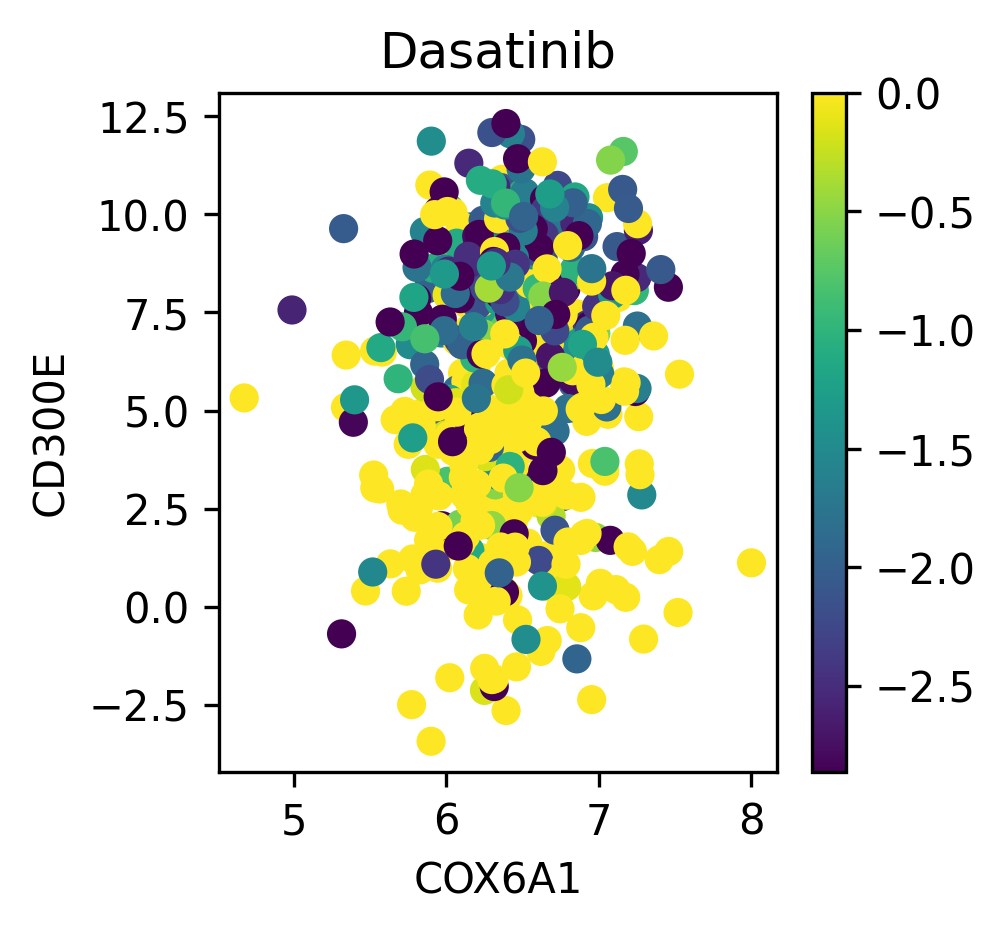

In [50]:
gene2 = "CD300E"
gene1 = "COX6A1"
drug = "Dasatinib"

ids = BeatAML_wave_3_expr.columns[4:]
SPP1_expr = BeatAML_wave_3_expr.loc[BeatAML_wave_3_expr['display_label'] == gene1,].values[0][4:]
RPS10_expr = BeatAML_wave_3_expr.loc[BeatAML_wave_3_expr['display_label'] == gene2,].values[0][4:]

data_sele = pd.DataFrame({"Sample":ids, "SPP1":SPP1_expr, "RPS10":RPS10_expr})
data_sele.index = data_sele['Sample']

sele_drug_df = BeatAML_wave_3_drugResponse.loc[BeatAML_wave_3_drugResponse['inhibitor']==drug,]
sele_drug_df['Sample'] = sele_drug_df['lab_id']
sele_drug_df.index =sele_drug_df['Sample'] 

#concat drug response and gene expression
data_com = pd.concat([data_sele, sele_drug_df], axis = 1)
data_com = data_com.dropna()

import numpy as np
data_com['logic50'] = np.log(data_com['ic50'])/np.log(10)
plt.figure(figsize=(3,3), dpi=300)

plt.scatter(data_com['SPP1'], data_com['RPS10'], c = data_com['logic50'], cmap='viridis')
plt.colorbar()

#plot x = y
import numpy as np
#x = np.linspace(3, 10, 10)
#y = x

#plt.plot(x, y, '-b', label='y=x')
plt.xlabel(gene1)
plt.ylabel(gene2)
plt.title(drug)
#plt.legend(loc='upper left')
plt.show()

#BeatAML_wave_3_expr.loc[BeatAML_wave_3_expr['display_label'] == 'RPS10']